<a href="https://colab.research.google.com/github/gritika18/MLnow_2.0/blob/main/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd '/content/drive/MyDrive/MLCodeSession/student'

/content/drive/MyDrive/MLCodeSession/student


In [3]:
ls

cleanedMathData.csv  student-merge.R  student.txt
student-mat.csv      student-por.csv  univariate_MathData_2.csv


In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os

In [5]:
mathData = pd.read_csv('cleanedMathData.csv')

In [6]:
mathData.head()

,Unnamed: 0,school,sex,address,Mjob,Fjob,higher,freetime,studytime,absences,G1,G2,G3
0,0,1,1,1,1,5,1,3,2,6,5,6,6
1,1,1,1,1,1,3,1,3,2,4,5,5,6
2,2,1,1,1,1,3,1,3,2,10,7,8,10
3,3,1,1,1,2,4,1,2,3,2,15,14,15
4,4,1,1,1,3,3,1,3,2,4,6,10,10


#Data Visualization

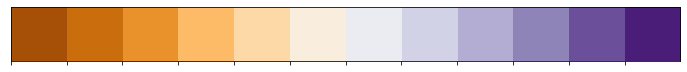

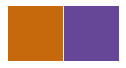

In [7]:
import seaborn as sns
sns.palplot(sns.color_palette('PuOr', 12)) 
# pal = sns.color_palette('PuOr', 12)     
# pal.as_hex()                            

import matplotlib.pyplot as plt
plt.style.use(['seaborn'])
sns_colors = ['#c6690c', '#664697']        
sns.set_palette(sns_colors)                 
sns.palplot(sns.color_palette(sns_colors))

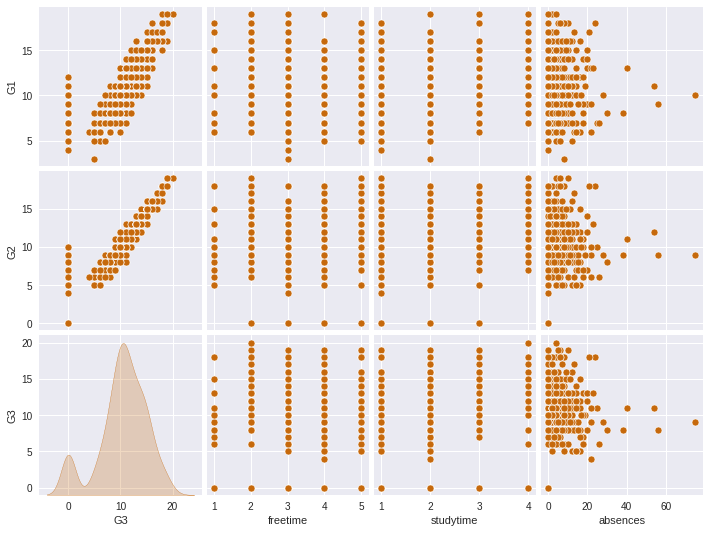

In [8]:
sns.pairplot(mathData,
             x_vars = [ 'G3', 'freetime', 'studytime', 'absences' ],
             y_vars = ['G1', 'G2', 'G3'],
       diag_kind='kde'
             )

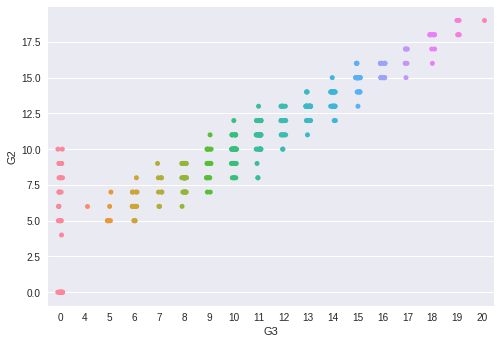

In [9]:
sns.stripplot(y='G2', x='G3', data=mathData)

In [10]:
uniMathData = mathData[['G2', 'G3']]
uniMathData.head()

,G2,G3
0,6,6
1,5,6
2,8,10
3,14,15
4,10,10


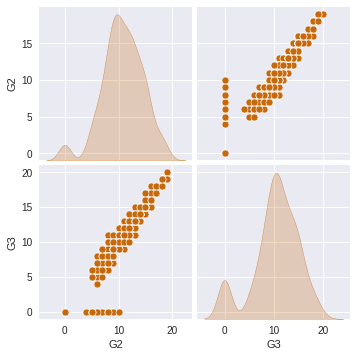

In [11]:
sns.pairplot(uniMathData,
             x_vars = ['G2', 'G3'],
             y_vars =  ['G2', 'G3'],
       diag_kind='kde'
             )

#Data Splits

In [12]:
trainDataset = uniMathData.sample(frac=0.8, random_state=0) 
testDataset = uniMathData.drop(trainDataset.index)

print(trainDataset.head())
print(testDataset.head())

     G2  G3
329  14  14
318  11  10
317  10   9
65   15  15
59   16  16
    G2  G3
9   15  15
25   9   8
28  11  11
31  16  17
32  16  16


In [13]:
print(trainDataset.shape)
print(testDataset.shape)

(316, 2)
(79, 2)


In [14]:
trainFeatures = trainDataset.copy()
testFeatures = testDataset.copy()

trainLabels = trainFeatures.pop('G3')
testLabels = testFeatures.pop('G3')

print(trainLabels.head())
print(testLabels.head())

329    14
318    10
317     9
65     15
59     16
Name: G3, dtype: int64
9     15
25     8
28    11
31    17
32    16
Name: G3, dtype: int64


In [15]:
print(trainFeatures.head())
print(testFeatures.head())

     G2
329  14
318  11
317  10
65   15
59   16
    G2
9   15
25   9
28  11
31  16
32  16


In [16]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

In [17]:
model.compile(
    loss = 'mean_absolute_error',  
    optimizer = tf.keras.optimizers.Adam(0.001),
    metrics = ['mae', 'mse'] 
)

In [18]:
numEpochs = 500
history = model.fit(x = trainFeatures, y = trainLabels, validation_data = (testFeatures, testLabels), epochs = numEpochs)

Epoch 1/500
10/10 [==============================] - 1s 19ms/step - loss: 24.0262 - mae: 24.0262 - mse: 660.4989 - val_loss: 25.1016 - val_mae: 25.1016 - val_mse: 718.9924
Epoch 2/500
10/10 [==============================] - 0s 3ms/step - loss: 23.9107 - mae: 23.9107 - mse: 654.2642 - val_loss: 24.9816 - val_mae: 24.9816 - val_mse: 712.2197
Epoch 3/500
10/10 [==============================] - 0s 3ms/step - loss: 23.7949 - mae: 23.7949 - mse: 648.0291 - val_loss: 24.8619 - val_mae: 24.8619 - val_mse: 705.5018
Epoch 4/500
10/10 [==============================] - 0s 3ms/step - loss: 23.6800 - mae: 23.6800 - mse: 641.9454 - val_loss: 24.7417 - val_mae: 24.7417 - val_mse: 698.7862
Epoch 5/500
10/10 [==============================] - 0s 4ms/step - loss: 23.5648 - mae: 23.5648 - mse: 635.8661 - val_loss: 24.6214 - val_mae: 24.6214 - val_mse: 692.0968
Epoch 6/500
10/10 [==============================] - 0s 3ms/step - loss: 23.4495 - mae: 23.4495 - mse: 629.7751 - val_loss: 24.5015 - val_mae: 2

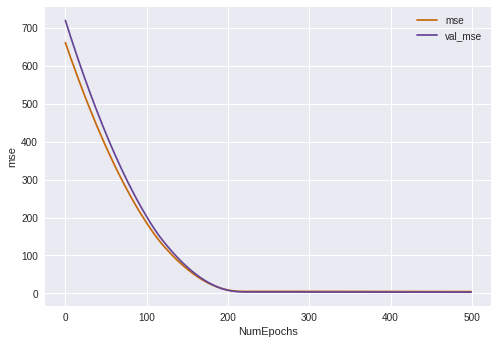

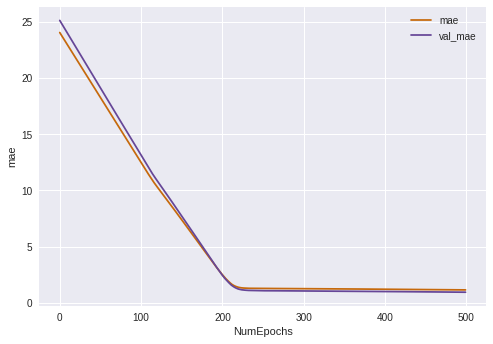

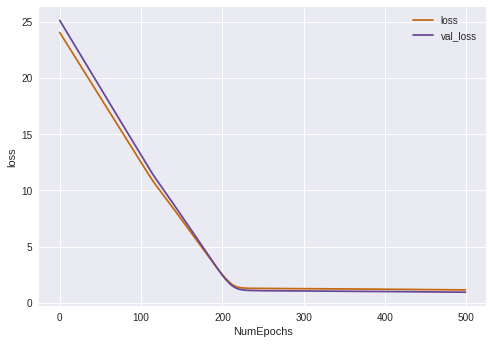

In [19]:
def curvePlots(tempString):
  plt.plot(history.history[tempString])
  plt.plot(history.history[f'val_{tempString}'])
  plt.xlabel('NumEpochs')
  plt.ylabel(tempString)
  plt.legend([tempString, f'val_{tempString}'])
  plt.show()


curvePlots('mse')
curvePlots('mae')
curvePlots('loss')

In [20]:
testPreds = model.predict(testFeatures).flatten()
print(testPreds)

[14.821061   9.354709  11.1768265 15.73212   15.73212   12.087885
 12.998943  17.554237  18.465294  10.265767  14.821061  14.821061
  6.621533   6.621533  10.265767  13.910003  10.265767  16.643177
  9.354709  11.1768265 14.821061  13.910003  12.998943  13.910003
  8.44365    4.7994156  1.1551809 11.1768265 12.998943  10.265767
 11.1768265 11.1768265 11.1768265  5.710474   9.354709  12.087885
  8.44365    9.354709  14.821061   9.354709   9.354709   6.621533
 12.087885   1.1551809 12.087885   1.1551809 10.265767  11.1768265
 12.087885  16.643177  10.265767  13.910003   9.354709  10.265767
 13.910003  11.1768265 14.821061  12.087885  12.998943   9.354709
 13.910003   8.44365   14.821061   8.44365   14.821061  12.087885
 14.821061  14.821061   7.532592   7.532592  12.087885  15.73212
 12.087885  14.821061  10.265767   6.621533  10.265767   6.621533
 12.087885 ]


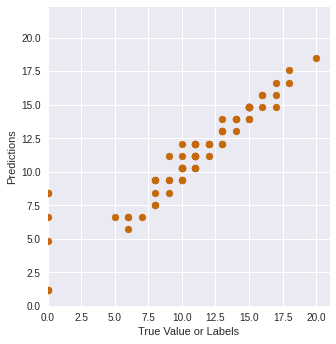

In [21]:
def predPlot(labels, predictions):
  plt.scatter(labels, predictions)
  plt.ylabel('Predictions')
  plt.xlabel('True Value or Labels')
  plt.axis('equal')
  plt.axis('square')
  plt.xlim([0, plt.xlim()[1]])
  plt.ylim([0, plt.ylim()[1]])
  plt.show()

predPlot(testLabels, testPreds)

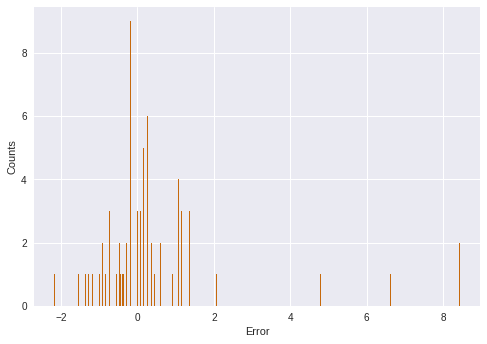

In [22]:
def errorPlot(preds, labels, counts):
  errors = preds - labels
  plt.hist(errors, counts)
  plt.xlabel('Error')
  plt.ylabel('Counts')
  plt.show()

errorPlot(testPreds, testLabels, numEpochs)